# Exercise 7 / Subgradient Method

### Overview

1. Implement a smooth approximation of:
    - ReLU
    - absolute value

1. Develop Subgradient method

1. Compute subgradient of:
    - robust regression
    - linear regression with $\mathcal{l}_1$ regularization
    - logistic regression with $\mathcal{l}_1$ regularization

### Submission

When done, paste your code into the quiz on Moodle and answer the questions.

## Utilities

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from typing import Callable
from numpy.typing import NDArray
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

In [ ]:
def contour_map(
    f: Callable[[NDArray], float],
    xb: tuple[float, float] = (-1.0, 1.0),
    yb: tuple[float, float] = (-1.0, 1.0),
    ax=None,
) -> None:
    """Plots the contour lines of a scalar function on a 2D grid.

    Args:
        f (Callable[[NDArray], float]): Scalar function mapping points to values.
        xb (tuple[float, float], optional): Lower and upper bounds for the x-axis. Defaults to (-1.0, 1.0).
        yb (tuple[float, float], optional): Lower and upper bounds for the y-axis. Defaults to (-1.0, 1.0).
        ax (optional): The axes to plot on. Defaults to None.
    """
    if ax is None:
        ax = plt
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    grid = np.block([[xv.reshape(1, -1)], [yv.reshape(1, -1)]]).T
    values = np.fromiter((f(point) for point in grid), dtype=np.double)
    ax.contour(xv, yv, values.reshape(nx, ny), 15)


def surface_plot(
    f: Callable[[NDArray], float],
    xb: tuple[float, float] = (-1.0, 1.0),
    yb: tuple[float, float] = (-1.0, 1.0),
) -> tuple[plt.Figure, Axes3D]:
    """Creates a 3D surface plot of a scalar function on a 2D grid.

    Args:
        f (Callable[[NDArray], float]): Scalar function mapping points to values.
        xb (tuple[float, float], optional): Lower and upper bounds for the x-axis. Defaults to (-1.0, 1.0).
        yb (tuple[float, float], optional): Lower and upper bounds for the y-axis. Defaults to (-1.0, 1.0).
    Returns:
        tuple[plt.Figure, Axes3D]: Figure and axis containing the rendered surface.
    """
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    grid = np.block([[xv.reshape(1, -1)], [yv.reshape(1, -1)]]).T
    values = np.fromiter((f(point) for point in grid), dtype=np.double)
    ax.plot_surface(xv, yv, values.reshape(nx, ny), cmap=cm.coolwarm)
    return fig, ax

In [ ]:
EXAMPLES = [
    (
        lambda x: abs(x[0]) + abs(8 * x[1]),
        lambda x: np.sign(x) * np.array([1, 8]),
        np.array([-0.5, 0.5]),
        (-1.0, 1.0),
        (-1.0, 1.0),
    ),
    (
        lambda x: abs(3 * x[0]) + abs(0.5 * x[1]),
        lambda x: np.sign(x) * np.array([3, 0.5]),
        np.array([0.5, -0.5]),
        (-1.0, 1.0),
        (-1.0, 1.0),
    ),
]


def run_examples(
    optimizer: Callable,
    optimizer_name: str,
) -> None:
    """Runs the subgradient method on example functions and visualizes the path.

    Args:
        optimizer (Callable): The optimizer to test.
        optimizer_name (str): Name of the optimizer.
    """
    for f, g, x0, x_bounds, y_bounds in EXAMPLES:
        xs = np.array(optimizer(x0, f, g))

        contour_map(f, xb=x_bounds, yb=y_bounds)
        plt.plot(xs[:, 0], xs[:, 1], ".--k", label=optimizer_name)
        plt.legend()
        plt.show()

In [ ]:
def plot_function(
    x0: NDArray,
    f: Callable,
    g: Callable,
) -> None:
    """
    Args:
        x0 (NDArray): The starting point.
        f (Callable): The objective function.
        g (Callable]): The gradient of the objective function.
    """
    subgrad = subgradient_path(x0, f, g)

    f_values = np.array([f(x) for x in subgrad])

    plt.semilogy(
        np.arange(len(subgrad)),
        f_values,
        label="subgradient",
    )

    plt.xlabel("Iteration")
    plt.ylabel("Function value")

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
def plot_smooth_approximation(
    original_function: Callable,
    smoothed_function: Callable,
    M_values: NDArray,
    x_bounds: tuple[float, float] = (-0.25, 0.25),
    n_points: int = 1000,
    function_name: str = "f",
) -> None:
    """Plots a function and its smooth approximations for different M values.

    Args:
        f (Callable): The original function to approximate.
        g (Callable): The smooth approximation function.
        M_values (NDArray): Array of M values to use for smoothing parameter.
        x_bounds (tuple[float, float], optional): Lower and upper bounds for x-axis. Defaults to (-0.25, 0.25).
        n_points (int, optional): Number of points to plot. Defaults to 1000.
        function_name (str, optional): Name of the function for the legend. Defaults to "f".
    """

    xx = np.linspace(*x_bounds, n_points)

    plt.plot(xx, original_function(xx), linewidth=2, label=function_name)
    for M in M_values:
        plt.plot(xx, smoothed_function(xx, M), label=f"M={M:.3f}") #  alpha = 10/M

    plt.xlabel("x")
    plt.ylabel("Function value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Task 1: Smoothing plots

Using the idea from **Task 4** from the **Theory** part, plot the "smooth" approximation of the following functions. 


### ReLU

Plot an approximation from Task 4 for the function
$$
\text{ReLU}(x) = \max(x, 0)
$$
for different values of $M$. 


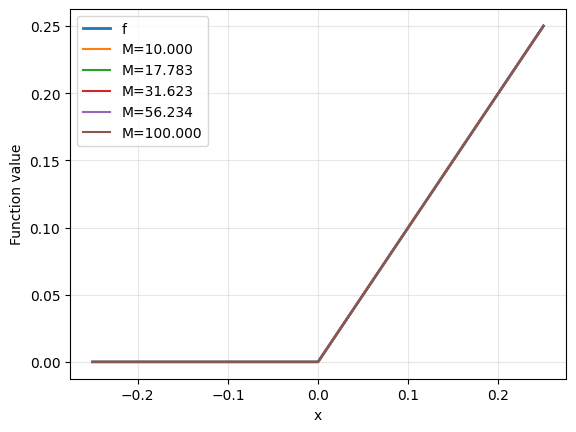

In [13]:
M = np.logspace(1, 2, 5)


# ReLU
def f(x):
    return np.maximum(x, 0)


# Smooth approximation of ReLU
def g(x, M):
    # TODO: implement smooth approximation of ReLU
    return np.log(np.exp(M * f(x))) / M

plot_smooth_approximation(f, g, M)

### Absolute value

Plot an approximation from Task 4 for the function
$$
\text{abs}(x) = |x|
$$
for different values of $M$.

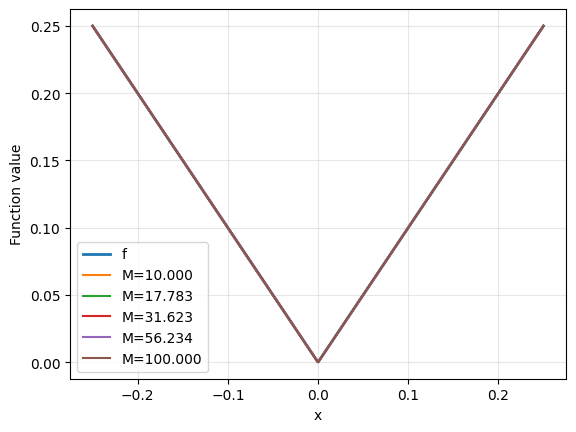

In [14]:
M = np.logspace(1, 2, 5)


# Absolute value
def f(x):
    return np.abs(x)


# Smooth approximation of absolute value
def g(x, M):
    # TODO: implement smooth approximation of absolute value
    # raise NotImplementedError
    return np.log(np.exp(M * f(x))) / M


plot_smooth_approximation(f, g, M)

## Task 2: Sub-gradient method

Implement the sub-gradient method.
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the subgradient of `f`.

Function `subgradient_path` should return a list of vectors on the path to the minimum.

In [16]:
def subgradient_path(
    x0: NDArray,
    f: Callable[[NDArray], float],
    g: Callable[[NDArray], NDArray],
    max_iter: int = 1000,
) -> list[NDArray]:
    """Performs the subgradient method with diminishing step size.

    Args:
        x0 (NDArray): The starting point.
        f (Callable[[NDArray], float]): The objective function.
        g (Callable[[NDArray], NDArray]): The subgradient of the objective function.
        max_iter (int, optional): The maximum number of steps. Defaults to 1000.

    Returns:
        list[NDArray]: The list of points visited during the optimization.
    """
    # TODO: Implement the subgradient method with diminishing step size.
    # raise NotImplementedError
    x = np.array(x0, dtype=float, copy=True)
    xs = [x0.copy()]
    eps = 1e-6
    for i in range(1, max_iter):
        sub_g = g(x)
        step_size = 1 / i
        x -= step_size * sub_g
        xs.append(x)
    print(xs)
    return xs

[array([-0.5,  0.5]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-06]), array([0.00000000e+00, 7.99201976e-

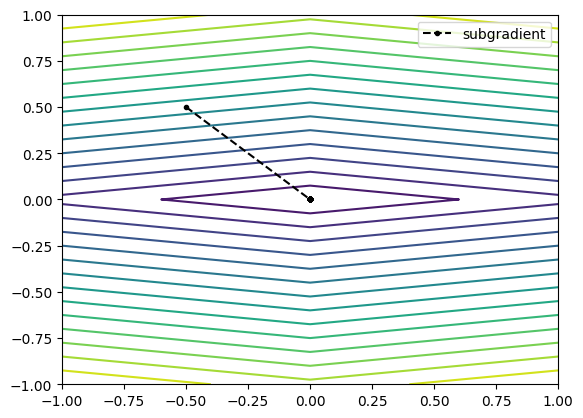

[array([ 0.5, -0.5]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0.

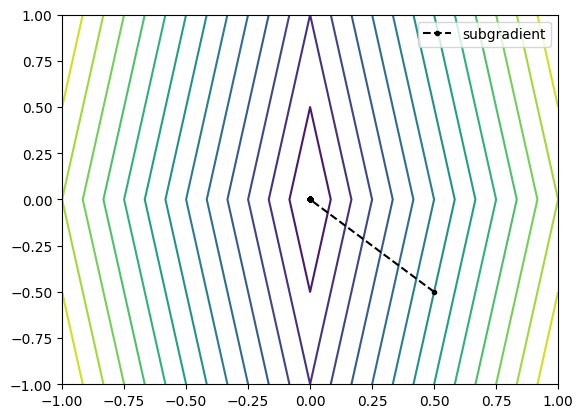

In [17]:
# run this to get plots
run_examples(
    optimizer=subgradient_path,
    optimizer_name="subgradient",
)

## Task 3: Error plots

Then compare and plot the error over time for the five methods on the following tasks.
Implementations of the prior methods are given in the Utils section.

### Robust regresssion

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_1
$$
run the sub-gradient method on it, and plot the function over time.

In [15]:
def f(w):
    return np.linalg.norm(X @ w - y, 1) / len(X)


def g(w):
    # TODO: Implement the subgradient
    raise NotImplementedError


X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

plot_function(x0, f, g)

NotImplementedError: 

### Linear regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_2^2 + \|w\|_1,
$$
run the sub-gradient method on it, and plot the function over time.

In [ ]:
def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X) + np.linalg.norm(w, 1)


def g(w):
    # TODO: Implement the subgradient
    raise NotImplementedError


X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

plot_function(x0, f, g)

### Logistic regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\sum_{i=1}^n \log(1 + \exp(-y_i \cdot x_i^\top w)) + \|w\|_1
$$
run the sub-gradient method on it, and plot the function over time.

In [ ]:
def f(w):
    return np.log(1.0 + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w, 1)


def g(w):
    # TODO: Implement the subgradient
    raise NotImplementedError


X, y = make_classification(
    1000,
    80,
    n_informative=40,
    # n_redundant=0,
    n_clusters_per_class=2,
    flip_y=0.1,
    random_state=0,
)

x0 = np.zeros(80)

plot_function(x0, f, g)